# Usage of Imgaug

In [1]:
from Imgaug import RotationTransform , FlipTransform ,BrightnessAugmentation ,ContrastTranform ,Kmeans , Imgaug , TiltImages

In [2]:
#-*- coding:utf-8 -*-
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy.random as npr
import random
import cv2

README <br>
변환 행렬을 구하는것이 시간이 좀 오래걸립니다. 0.23초 정도 걸리는듯 한데 <br> mask 양이 늘어나거나  , 이미지 크기가 증가하거나 , cpu 연산 속도가 떨어지면 더 시간이 오래 걸릴 것입니다.<br>
그리고 제 코드중 mask의 rotate 을 할때 bbox 의 x1,y1,x2,y2 좌표를 이미지에 매칭시킨후 <br>이미지를 돌리고 회전된 이미지에서 다시 rectangle 을 
찾는 방식입니다. <br>변환 행렬을 구하고 좌표를 변환 행렬에 넣어서 새로운 좌표를 얻는 방식이면 시간이 좀더 단축될것 같습니다.<br>(지금은 좌표를 매칭한 이미지를 돌리는 방식이라서 시간이 오래 걸립니다)

Tensorflow 에서는 input pipeline 에서 이미지를 queue 에 넣을때 병렬로 preprocessing 을 하면서 학습 모델을 학습 시키기 때문에 상관이 없는데 
Pytorch 에서는 위 방법을 쓸수 있는지 모르겠네요.
알아본 방법에는 GPU을 통해 이미지 Augmentation 을 시킬수 있다고 하는데 그 방법을 한번 적용해보시는게 어떨까 싶습니다.

ref : https://github.com/NVIDIA/DALI




Randomly Tilt , Rotate , Flip Flop 은 
return 형태가 np_img (transformed ) 그리고 좌표들입니다 .
그리고 bight 와 contrast 변경은 단순히 return 이 numpy 입니다 . 

그리고 모든 라이브러리의 input 은 numpy 로 주셔야 합니다. 


# Original Image 

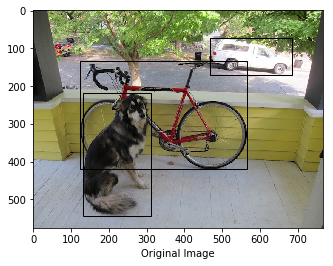

In [3]:
img = Image.open('dog.jpg')
coord_bike = [124,134,124+ 443,134+286]
coord_car = [468,74,468+218,74+96]
coord_dog = [131,219,131+180,219+324]
fig = plt.figure()
ax=fig.add_subplot(111)
rect_1 = patches.Rectangle((468,74) , 218 ,96 ,fill='')
rect_2 = patches.Rectangle((124,134) , 443 ,286 ,fill='')
rect_3 = patches.Rectangle((131,219) , 180 ,324 ,fill='')
ax.add_patch(rect_1 )
ax.add_patch(rect_2 )
ax.add_patch(rect_3 )
ax.imshow(img)
ax.set_xlabel('Original Image')
plt.show()

# Randomly Tilt , Rotate , Flip Flop  

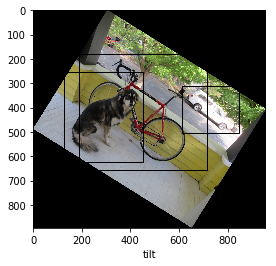

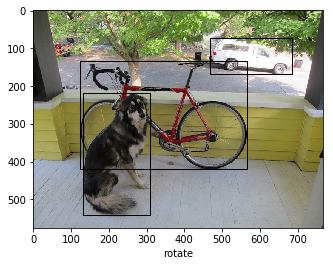

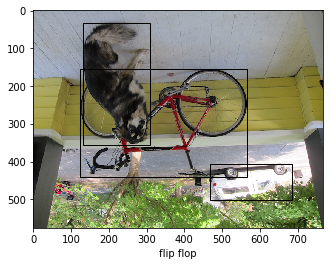

In [4]:
img = Image.open('dog.jpg').convert('RGB')
np_img = np.asarray(img)
coord_bike = [124,134,124+ 443,134+286]
coord_car = [468,74,468+218,74+96]
coord_dog = [131,219,131+180,219+324]
coords = [coord_bike , coord_car , coord_dog]
# random int 
k=random.randint(0,45)
# rotate angle
imgaug =Imgaug()
tilt_images = TiltImages()
t_img , t_coords =tilt_images(np_img , coords , k)
imgaug.show_image(t_img, t_coords , 'tilt')

# rotate 90 , 180 ,270
imgaug =Imgaug()
rt_images = RotationTransform()
rt_img , rt_coords = rt_images(np_img , coords , k)
imgaug.show_image(rt_img, rt_coords , 'rotate')

# flip flop images
imgaug = Imgaug()
ft_images = FlipTransform()
ft_img, ft_coords = ft_images(np_img, coords, k)
imgaug.show_image(ft_img, ft_coords , 'flip flop'.format(k) )

# Change Bright Image 

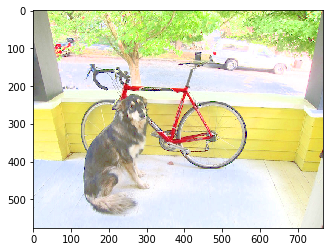

In [14]:
np_img=np.asarray(img)
br = BrightnessAugmentation()
br_img =br(np_img  , 100)
plt.imshow(br_img)
plt.show()

# Change Contrast 

(576, 768, 3)


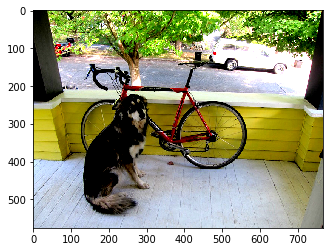

In [11]:
ct = ContrastTranform()
ct_img=ct(np_img ,100)
print np.shape(np.asarray(ct_img))
plt.imshow(ct_img)
plt.show()

# K-means 

In [ ]:
# K -means가 yolo v3 어떻게 사용되는지 몰라 오픈소스의 k means 코드를 첨부하였습니다
# 정확히 읽어보진 못했지만 iou을 통해 distance 을 계산하고 distance을 계산하기 위해 k means 에 dx ,dy , dw ,dh 
#(target bbox , Regression을 위해 변환한) 을 넣는다고 합니다. 
# param : boxes 에 dx , dy ,dw ,dh 을 넣어야 할것 같습니다.

# def kmeans(self, boxes, k, dist=np.median):

param : boxes # 박스의 좌표 
param : k # cluster 갯수 
param : np.median # distance 도출 방식